In [30]:
# Importación de los modulos a utilizar
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Cargar el modelo entrenado
cnn_model = load_model('../models/cnn_model.h5')
mlp_model = load_model('../models/mlp_model.h5')

In [32]:
# Cargar el data de testeo para cada red neuronal y realizar las predicciones
x_test_mlp = np.load('../data/processed/test_mlp.npy')
y_pred_probs_mlp = mlp_model.predict(x_test_mlp)
y_pred_labels_mlp = np.argmax(y_pred_probs_mlp, axis=1)

x_test_cnn = np.load('../data/processed/test_cnn.npy')
y_pred_probs_cnn = cnn_model.predict(x_test_cnn)
y_pred_labels_cnn = np.argmax(y_pred_probs_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [33]:
# Obtener las etiquetas reales
y_test = np.load('../data/processed/test_labels.npy')
y_test_labels = np.argmax(y_test, axis=1)

In [34]:
# Calcular matrices de confusión
conf_matrix_cnn = confusion_matrix(y_test_labels, y_pred_labels_cnn)
conf_matrix_mlp = confusion_matrix(y_test_labels, y_pred_labels_mlp)

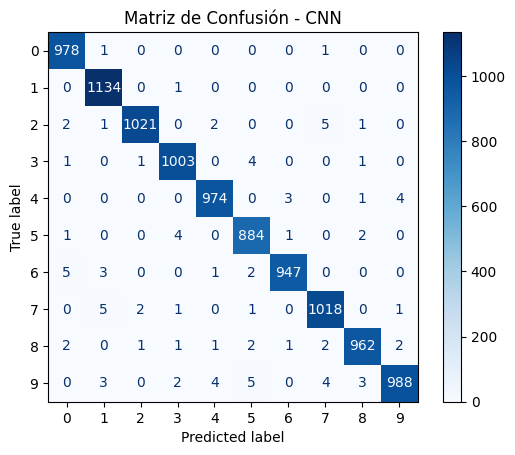

In [44]:
# Mostrar la matriz de confusión para CNN
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cnn, display_labels=range(10))
disp_cnn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - CNN")

# Guardar la matriz de confusión - CNN
plt.savefig("confusion_matrix_cnn.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

# Visualizacion de la matriz de confusion - CNN
plt.show()


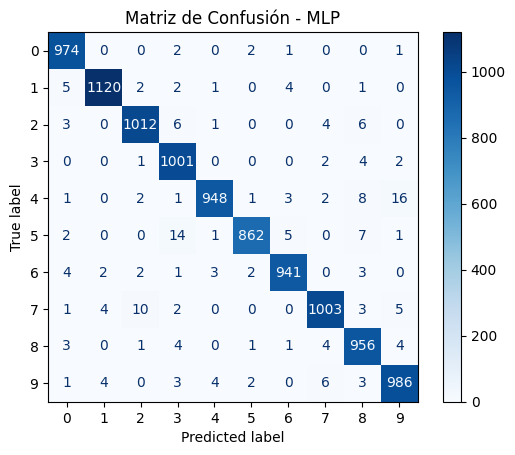

In [43]:
# Mostrar la matriz de confusión para MLP
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mlp, display_labels=range(10))
disp_mlp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - MLP")

# Guardar la matriz de confusión - MLP
plt.savefig("confusion_matrix_mlp.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

# Visualizacion de la matriz de confusion - MLP
plt.show()